In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
cab_data = pd.read_csv("Cab_Data.csv")
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [3]:
cab_data.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


In [4]:
city_data = pd.read_csv("City.csv")
city_data.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [5]:
city_data.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,NEW YORK NY,"8,405,837","302,149"
freq,1,1,1


In [6]:
a = cab_data['Date of Travel'].to_list()
base_date = pd.Timestamp('1899-12-29')
dates = [base_date + pd.DateOffset(date_offset) for date_offset in a]
cab_data['Date of Travel'] = pd.to_datetime(dates, format='%y/%m/%d')

In [7]:
cab_data.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000


In [8]:
cust_id = pd.read_csv("Customer_ID.csv")
cust_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [9]:
cust_id.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [10]:
transaction_id = pd.read_csv("Transaction_ID.csv")
transaction_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [11]:
transaction_id.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


In [12]:
city_data['Population'] = [x.replace(',','') for x in city_data['Population']]
city_data['Population'] = city_data['Population'].astype(float)

# Attribute 'Users' should be an integer
city_data['Users'] = [x.replace(',','') for x in city_data['Users']]
city_data['Users'] = city_data['Users'].astype(float)

# Creating the Master Dataset after Merging

In [13]:
df= cab_data.merge(transaction_id, on= 'Transaction ID').merge(cust_id, on ='Customer ID').merge(city_data, on = 'City')
df.head(2)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885.0,24701.0
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885.0,24701.0


In [14]:
df.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
359387,10307228,2018-03-02,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,418859.0,127001.0
359388,10319775,2018-04-12,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,418859.0,127001.0
359389,10347676,2018-07-05,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,418859.0,127001.0
359390,10358624,2018-08-01,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,418859.0,127001.0
359391,10370709,2018-08-29,Yellow Cab,WASHINGTON DC,34.24,453.11,427.3152,51406,Card,Female,29,6829,418859.0,127001.0


# Visualizing the Data

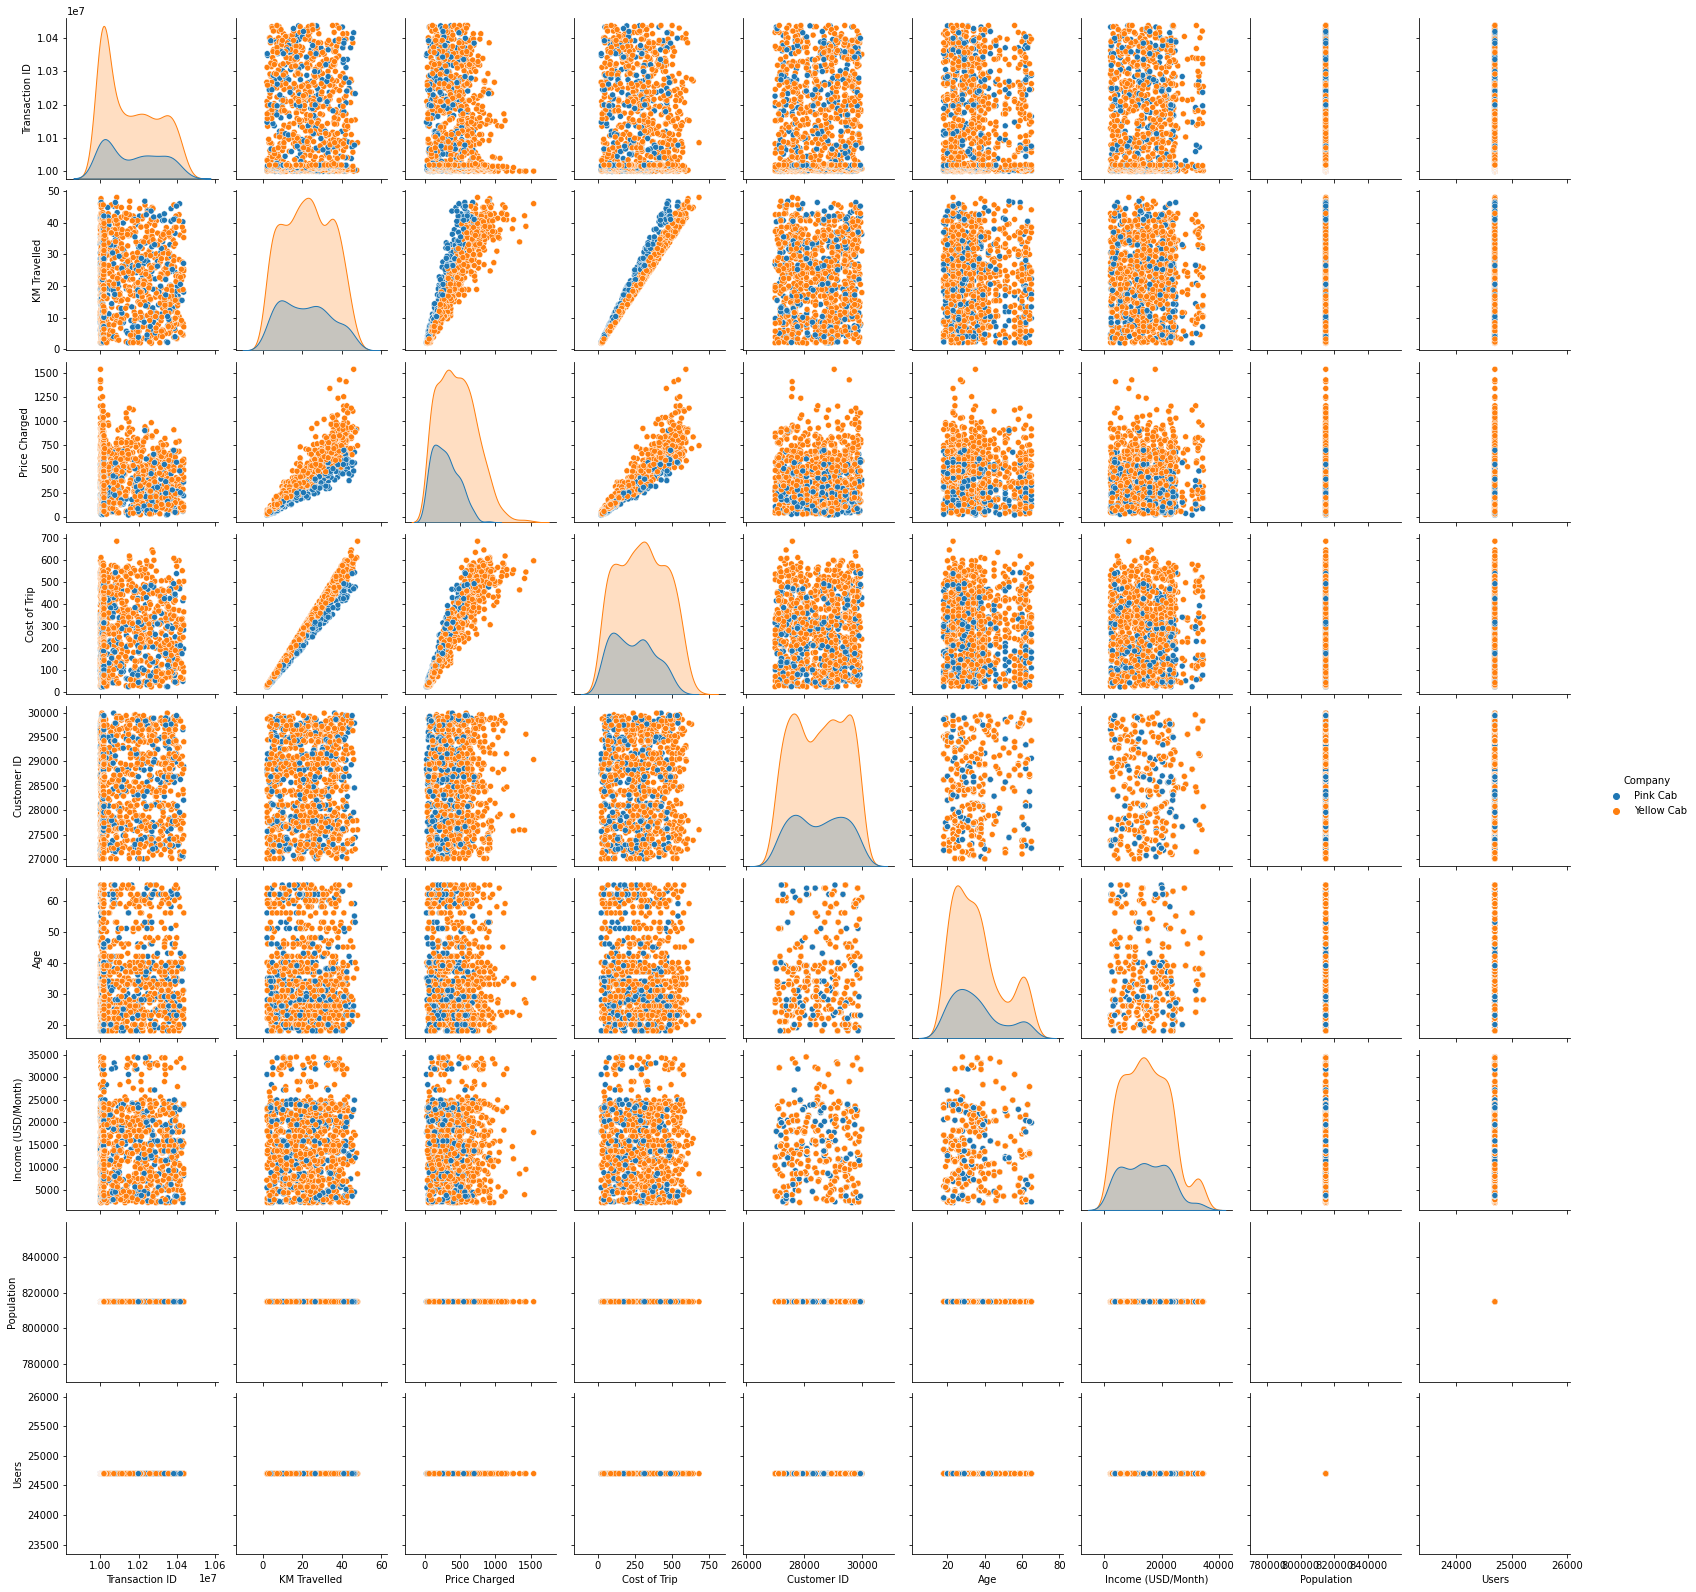

In [15]:
sns.pairplot(df.head(1000),hue = 'Company')

In [16]:
master_data_corr = df.corr()
master_data_corr

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users
Transaction ID,1.000000,-0.001429,-0.052902,-0.003462,-0.016912,-0.001267,-0.001570,0.023868,0.013526
KM Travelled,-0.001429,1.000000,0.835753,0.981848,0.000389,-0.000369,-0.000544,-0.002311,-0.000428
Price Charged,-0.052902,0.835753,1.000000,0.859812,-0.177324,-0.003084,0.003228,0.326589,0.281061
Cost of Trip,-0.003462,0.981848,0.859812,1.000000,0.003077,-0.000189,-0.000633,0.015108,0.023628
Customer ID,-0.016912,0.000389,-0.177324,0.003077,1.000000,-0.004735,-0.013608,-0.647052,-0.610742
Age,-0.001267,-0.000369,-0.003084,-0.000189,-0.004735,1.000000,0.003907,-0.009002,-0.005906
Income (USD/Month),-0.001570,-0.000544,0.003228,-0.000633,-0.013608,0.003907,1.000000,0.011868,0.010464
Population,0.023868,-0.002311,0.326589,0.015108,-0.647052,-0.009002,0.011868,1.000000,0.915490
Users,0.013526,-0.000428,0.281061,0.023628,-0.610742,-0.005906,0.010464,0.915490,1.000000


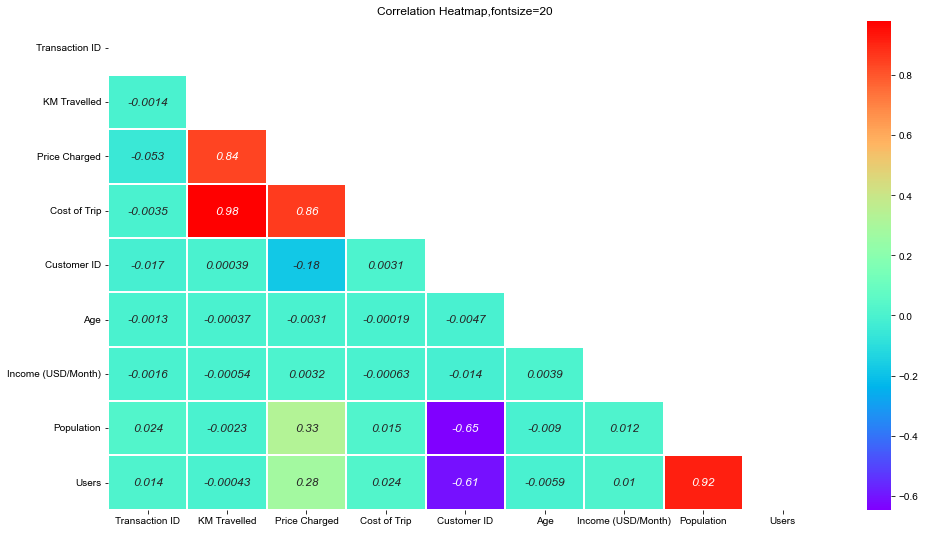

In [17]:
plt.figure(figsize=(16,9))

annot_kws = {'fontsize':12,'fontstyle':'italic', 'alpha':1 }

matrix = np.triu(master_data_corr)

ax = sns.heatmap(master_data_corr, mask=matrix,cmap='rainbow',annot=True,linewidth=1.5,annot_kws=annot_kws)

plt.title('Correlation Heatmap,fontsize=20')

sns.set(font_scale = 1.2)

# 3.1 Travel by the User

In [18]:
user = df.groupby('Company')
avg_user = user.Users.mean()
index = avg_user.index
value = avg_user.values

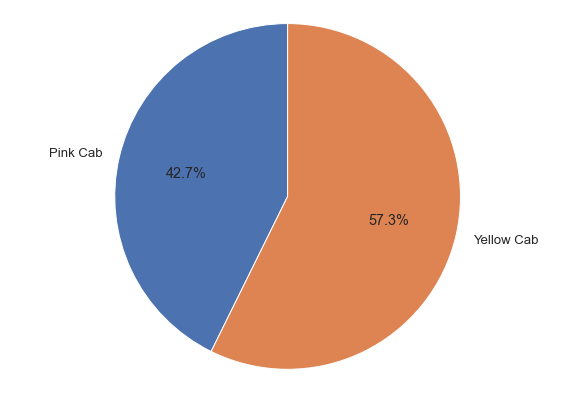

In [19]:
fig,axp = plt.subplots(figsize=(10,7))
axp.pie(value,labels=index,autopct='%2.1f%%',startangle=90)
axp.axis('equal')
plt.show()

We can clearly see that the users use the yellow cab company to travel most often

# 3.2 Travelled Distribution in KM

Text(0, 0.5, 'Frequency')

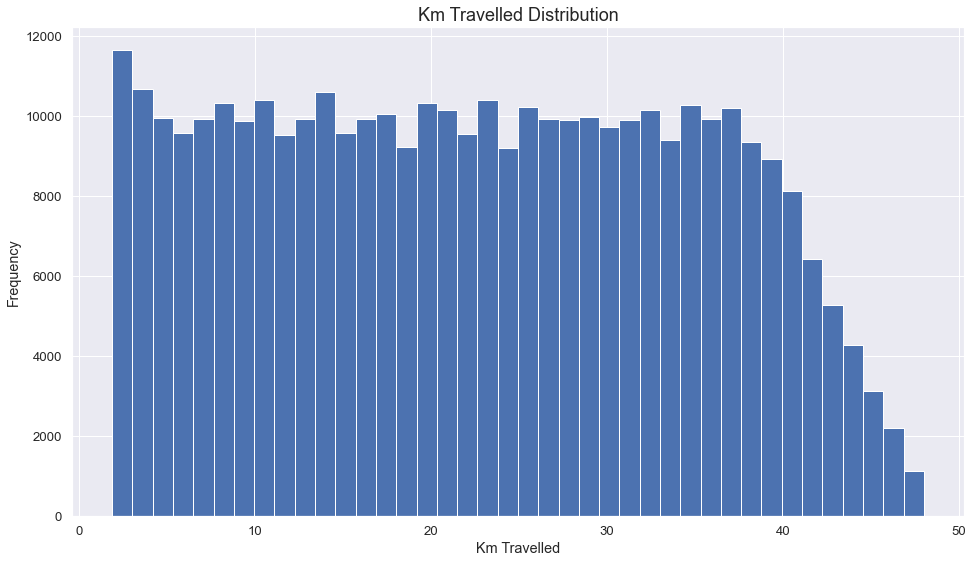

In [20]:
plt.figure(figsize = (16,9))
plt.hist(df['KM Travelled'],bins=40)
plt.title('Km Travelled Distribution',fontsize=18)
plt.xlabel('Km Travelled')
plt.ylabel('Frequency')

It is clearly visible that most of the rides vary from 2 to 48km.

# 3.3 Mode of Payment

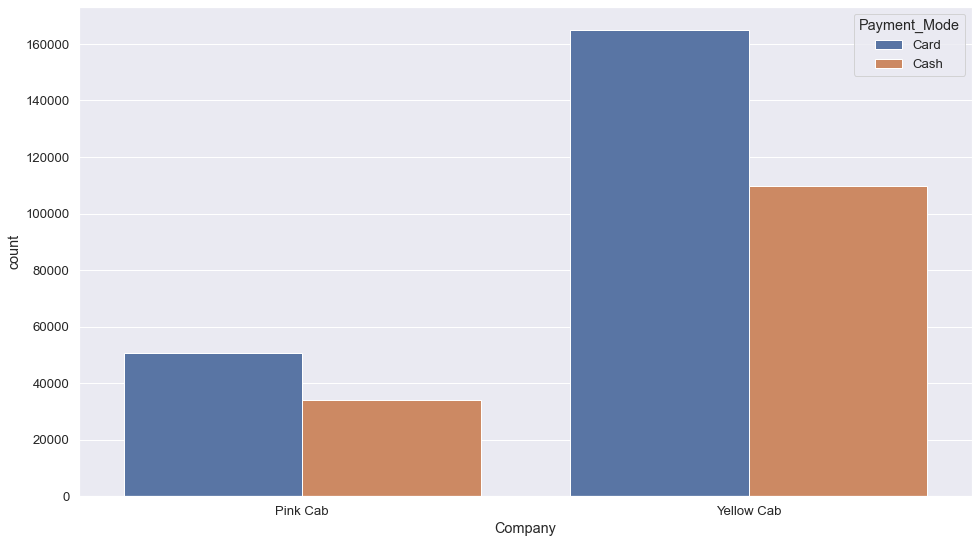

In [21]:
plt.figure(figsize=(16,9))
sns.countplot(x="Company",hue="Payment_Mode",data=df)
plt.show()

Both the companies mostly use the card as the method of payment

# 3.4 Which gender prefers to travel in a Car

In [22]:
gender_cab=df.groupby(['Company','Gender'])
gender_cab  = gender_cab['Customer ID'].nunique()
print(gender_cab)

Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: Customer ID, dtype: int64


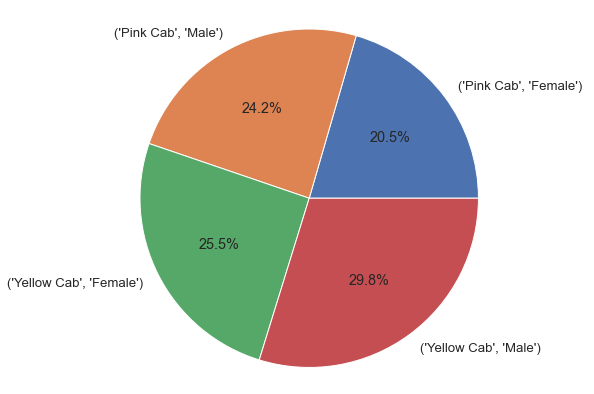

In [23]:
labs = gender_cab.index
vals = gender_cab.values
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(vals , labels=labs, autopct='%2.1f%%')
axp.axis('equal')
plt.show()

We can clearly see that male and female both of them use mostly use Yellow cab only.

# 3.5 Users and their respected cities

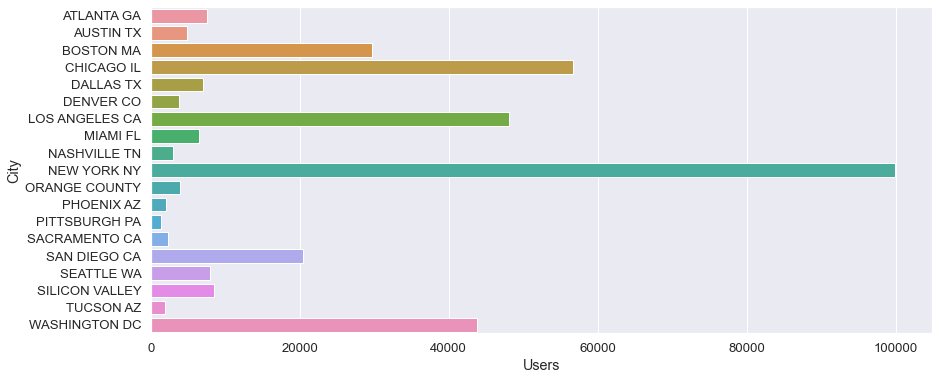

In [24]:
plt.figure(figsize=(14,6))
city_users = df.groupby('City')
city_users = city_users.Users.count()
label = city_users.index
value = city_users.values
sns.barplot(x=value,y=label)
plt.xlabel("Users")
plt.ylabel("City")
plt.show()

New York has the largest number of users followed by chicago and Los Angeles.

# 3.6 What is the Margin of Profit?

In [25]:
company = df.groupby('Company')
price_charged = company['Price Charged'].mean()
cost_trip = company['Cost of Trip'].mean()
c = cost_trip.index
c_v = cost_trip.values
c_p = price_charged.values

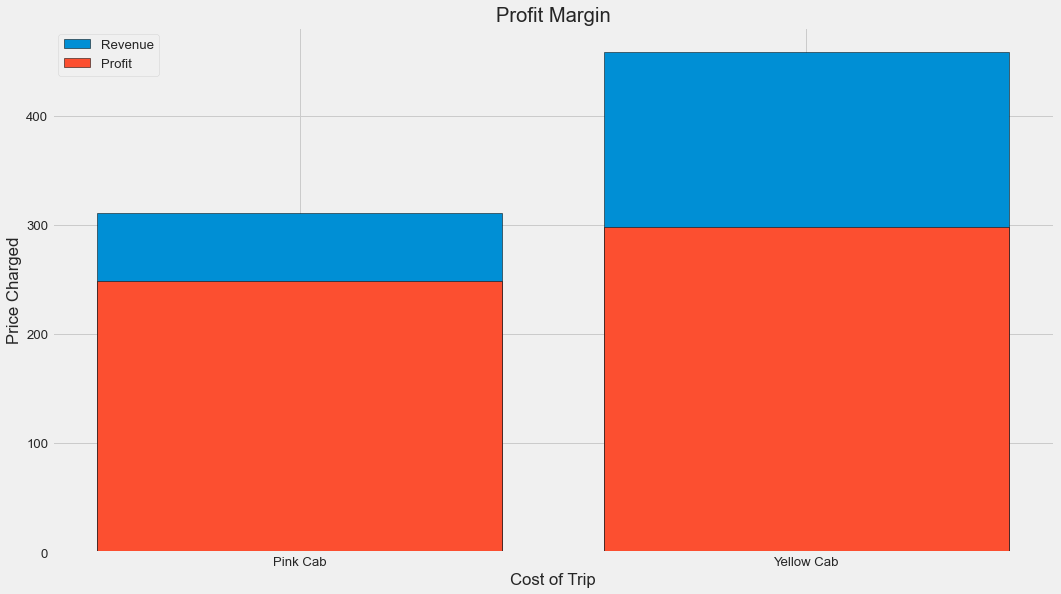

In [26]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (16, 9))
plt.bar(c, c_p, edgecolor='black', label="Revenue")
plt.bar(c, c_v, edgecolor='black', label="Profit")
plt.title('Profit Margin')
plt.ylabel('Price Charged')
plt.xlabel('Cost of Trip')
plt.legend()
plt.show()

Yellow cab has higher profit of margin as compared to the Pink Cab.

In [27]:
df['Year'] = df['Date of Travel'].dt.year
df['Month'] = df['Date of Travel'].dt.month
df['Day'] = df['Date of Travel'].dt.day
df['Profit'] = df['Price Charged'] - df['Cost of Trip']

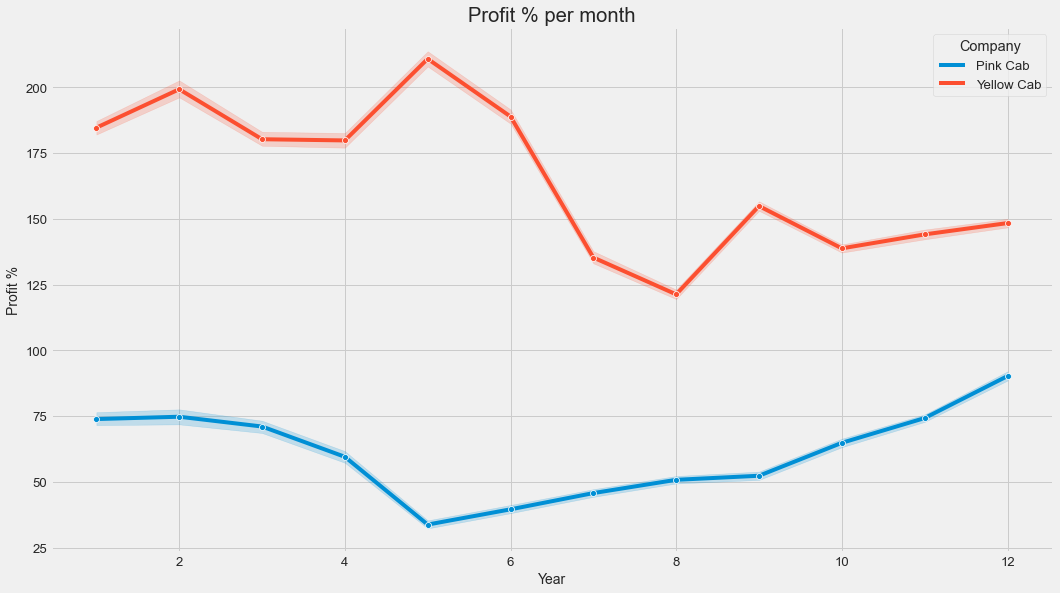

In [28]:
plt.figure(figsize = (16, 9))
sns.lineplot(x='Month', y='Profit', hue="Company", data=df, marker='o')
plt.xlabel("Year", size=14)
plt.ylabel("Profit %", size=14)
plt.title("Profit % per month")
plt.show()

# 3.7 Users Population per City

In [29]:
urp = (city_data['Users'] /city_data['Population']) * 100 
city = city_data['City']

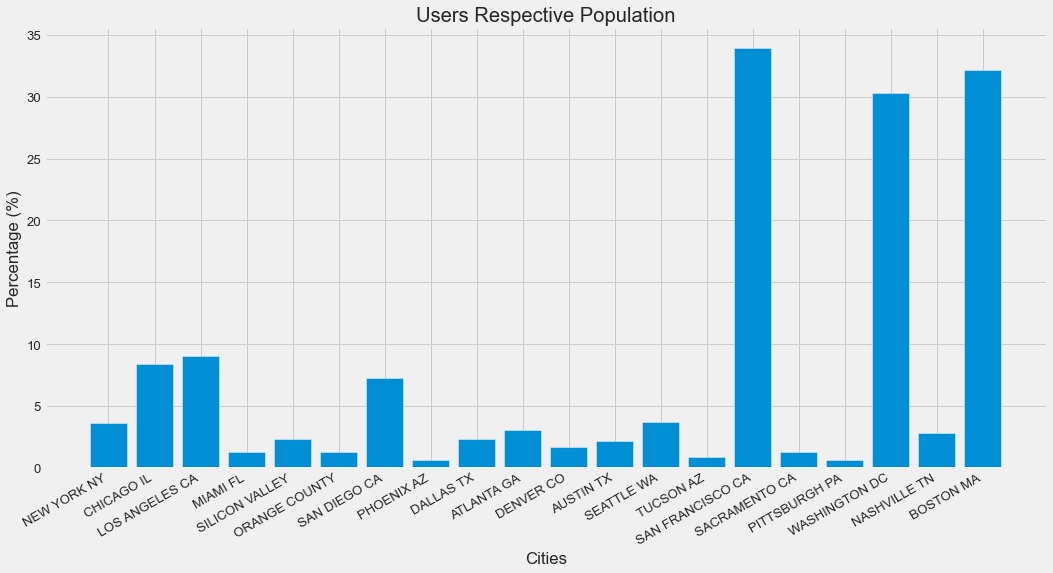

In [30]:
plt.figure(figsize = (16, 9))
plt.bar(city, urp)
plt.gcf().autofmt_xdate()
plt.title('Users Respective Population')
plt.ylabel('Percentage (%)')
plt.xlabel('Cities')
plt.show()

We can clearly see that San Fran cisco, Washington and Boston have about 30% of the population use cab service

# 3.8 What is the Average Income of the users?

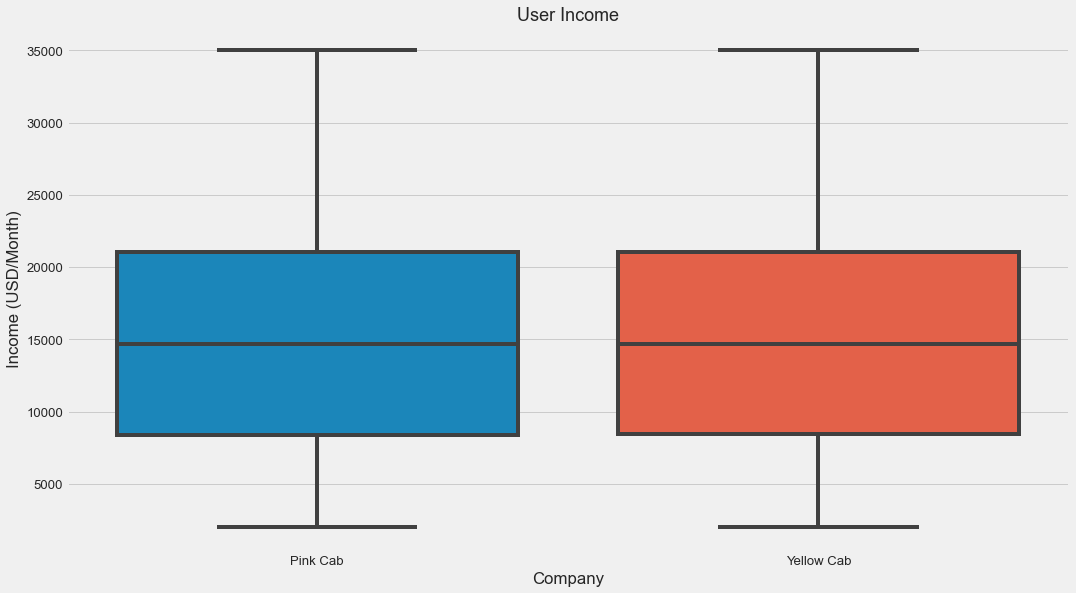

In [31]:
plt.figure(figsize = (16, 9))

sns.boxplot(df['Company'], df['Income (USD/Month)'])
plt.title('User Income', fontsize=18)
plt.show()



The average income is around 15k$ who use the cab service

# 3.9 What could be the price charged with respect to the distance?

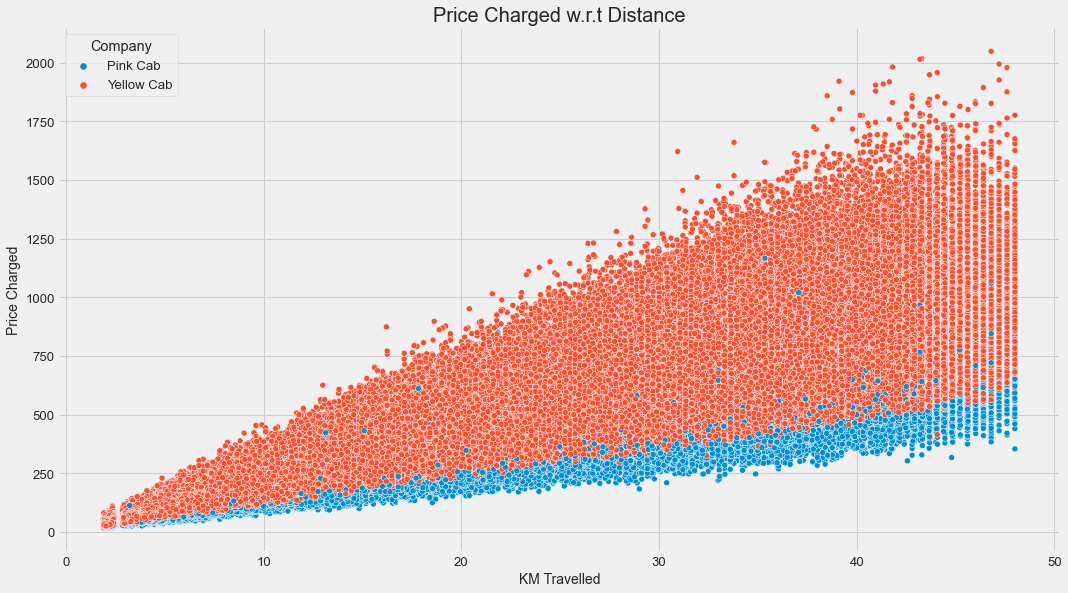

In [46]:
plt.figure(figsize = (16, 9))

sns.scatterplot(data=df, x="KM Travelled", y='Price Charged', hue='Company')
plt.title('Price Charged w.r.t Distance',fontsize = 20)
plt.ylabel('Price Charged',fontsize = 14)
plt.xlabel('KM Travelled',fontsize = 14)
plt.show()

We expected a linear relationship between Km travelled and price charged and it is true from the above plot. However, yellow cab has high charges as compared to the Pink Cab

# Hypothesis Testing

1. Is there any difference in profit regarding Gender?
H0: There is no difference regarding gender in both cab companies
H1: There is a difference regarding gender in both companies

In [47]:
a = df[(df.Gender=='Male')&(df.Company=='Pink Cab')]
b =  a.groupby('Transaction ID').Profit.mean()
c = df[(df.Gender=='Female')&(df.Company=='Pink Cab')]
d = c.groupby('Transaction ID').Profit.mean()
print(b.shape[0],d.shape[0])

_, p_value = stats.ttest_ind(b.values,
                             d.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding gender for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding gender for Pink Cab')

47231 37480
P value is  0.11515305900425798
We accept null hypothesis (H0) that there is no difference regarding gender for Pink Cab


In [48]:
a = df[(df.Gender=='Male')&(df.Company=='Yellow Cab')]
b =  a.groupby('Transaction ID').Profit.mean()
c = df[(df.Gender=='Female')&(df.Company=='Yellow Cab')]
d = c.groupby('Transaction ID').Profit.mean()
print(b.shape[0],d.shape[0])

_, p_value = stats.ttest_ind(b.values,
                             d.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding gender for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding gender for Yellow Cab')

158681 116000
P value is  6.060473042494144e-25
We accept alternative hypothesis (H1) that there is a difference regarding gender for Yellow Cab


2. Could there be any difference in the profit regarding age?
H0: There is no difference regarding age in both cab companies
H1: There is difference regarding Age in both companies

In [49]:
a = df[(df.Age<=50)&(df.Company=='Pink Cab')]
b =  a.groupby('Transaction ID').Profit.mean()
c = df[(df.Age>50)&(df.Company=='Pink Cab')]
d = c.groupby('Transaction ID').Profit.mean()
print(b.shape[0],d.shape[0])

_, p_value = stats.ttest_ind(b.values,
                             d.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding age for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding age for Pink Cab')

71228 13483
P value is  0.32817487547980695
We accept null hypothesis (H0) that there is no difference regarding age for Pink Cab


In [50]:
a = df[(df.Age<=50)&(df.Company=='Yellow Cab')]
b =  a.groupby('Transaction ID').Profit.mean()
c = df[(df.Age>50)&(df.Company=='Yellow Cab')]
d = c.groupby('Transaction ID').Profit.mean()
print(b.shape[0],d.shape[0])

_, p_value = stats.ttest_ind(b.values,
                             d.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding age for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding age for Yellow Cab')

231480 43201
P value is  6.494256817799368e-09
We accept alternative hypothesis (H1) that there is a difference regarding age for Yellow Cab


Looks like the yellow cab company might be offering some kind of discount for the users who are more than 60 years old.

3. Could there be any difference in the profit regarding payment mode
H0: There is no difference regarding payment mode in both cab companies
H1: There is difference regarding payment mode in both the cab companies

In [51]:
a = df[(df['Payment_Mode']=='Cash')&(df.Company=='Pink Cab')]
b =  a.groupby('Transaction ID').Profit.mean()
c = df[(df['Payment_Mode']=='Card')&(df.Company=='Pink Cab')]
d = c.groupby('Transaction ID').Profit.mean()
print(b.shape[0],d.shape[0])

_, p_value = stats.ttest_ind(b.values,
                             d.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding payment mode for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding payment mode for Pink Cab')

33992 50719
P value is  0.7900465828793288
We accept null hypothesis (H0) that there is no difference regarding payment mode for Pink Cab


In [52]:
a = df[(df['Payment_Mode']=='Cash')&(df.Company=='Yellow Cab')]
b =  a.groupby('Transaction ID').Profit.mean()
c = df[(df['Payment_Mode']=='Card')&(df.Company=='Yellow Cab')]
d = c.groupby('Transaction ID').Profit.mean()
print(b.shape[0],d.shape[0])

_, p_value = stats.ttest_ind(b.values,
                             d.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding payment mode for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding payment mode for Yellow Cab')

109896 164785
P value is  0.2933060638298729
We accept null hypothesis (H0) that there is no difference regarding payment mode for Yellow Cab
